# Avocado Dataset Final Project

We first load the necessary libraries and the avocado dataset. And check the [description](https://www.kaggle.com/datasets/neuromusic/avocado-prices) of the dataset to understand its features.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

> PLU codes for avocados are Price Look-Up codes on stickers that identify the fruit's type and size for retailers. Common non-organic Hass avocado PLU codes are 4046 (small/medium), 4225 (large), and 4770 (extra-large). Organic Hass avocados have the same PLU codes but with a prefix of 9 (e.g., 94046 for small/medium organic Hass avocados).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# make plots appear in the notebook
%matplotlib inline
# %matplotlib notebook make plots interactive
sns.set_theme(style="darkgrid")
    
df = pd.read_csv("datasets/avocado.csv")

## Avocados dataset EDA Report

A quick exploratory data analysis (EDA) report of the avocado dataset shows the following insights:

In [3]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Avocados Dataset EDA Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 42.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations about the dataset:
- The dataset contains a column Unnamed: 0 which is just an index column and can be dropped.
- There are **no missing values NaN** in the dataset.
- All features are of appropriate data types, but **DateTime should be converted to a datetime object**.
- We have **more data points from albany at atlanta regions**, so it is **skewed towards those regions**.
- The **data is mostly from 2015 to 2017 with a good distribution** across the years. But only a **few data points on 2018**.
- Type feature has two categories: conventional and organic, with equally distributed data points.

Core insights from the data:
- Average price is **right-skewed**, with most prices between $1.00 and $1.50, and a few higher-priced avocados.
- **Correlation between type and average price, with organic avocados generally being more expensive**.
- **Correlation total volume and total bags as expected**.
- **XLarge bags has zeroes in many rows**, 66%. **It seems to indicate that the bag size is less used**.
- **4770 PLU code (Extra-large variety) has many zeroes**, 30%. **It seems to indicate that this variety is less popular**.

We can also do it the old way

In [4]:
df.head()
print(df.dtypes)
# df.info()
df.isnull().sum()

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We apply the mentioned fixes.

In [5]:
# Drop the 'Unnamed: 0' column as it is just an index
df = df.drop(columns=['Unnamed: 0'])
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()


Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

We check price distribution.

Text(0.5, 0, 'Average Price')

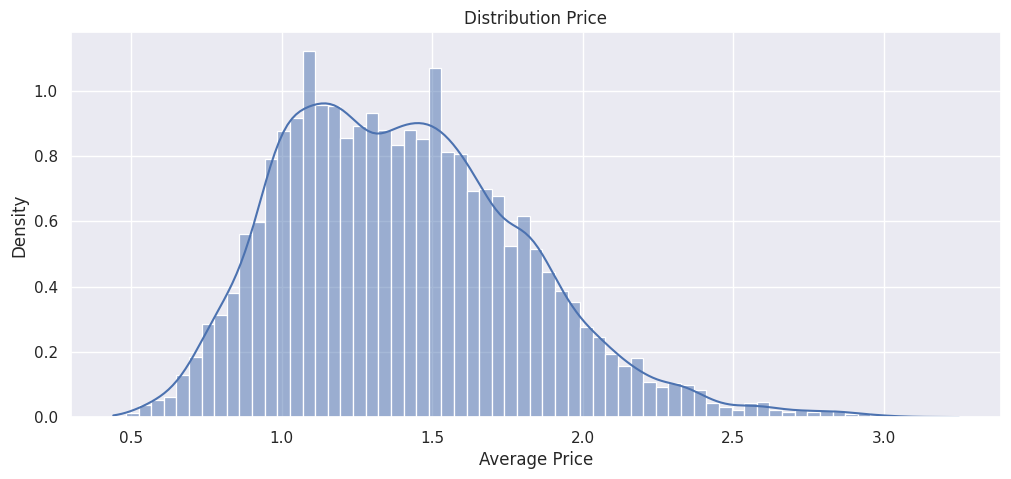

In [6]:
plt.figure(figsize=(12, 5))
plt.title('Distribution Price')
# kde: kernel density estimate. It is a way to estimate the probability density function of a continuous random variable.
# This is often preferred over traditional histograms because it produces a smoother output and avoids the arbitrary binning of histograms
ax = sns.histplot(df['AveragePrice'], kde=True, stat="density")
ax.set_xlabel('Average Price')
# kde=True adds a smooth curve approximating the density.
# stat="density" scales the histogram bars so their total area = 1.
# This allows comparison with the density curve. Otherwise, the histogram shows counts / frequencies.

A density curve helps you visualize the distribution, central tendency, spread, and probabilities of a dataset.

1. Shape of Distribution: You can see if it is symmetric, skewed to the right (high prices), or skewed to the left (low prices).

2. Central Tendency: The peak of the density curve indicates the most common price range, giving insights into the average price. For symmetric distributions, the mean and median are close together. For skewed distributions, the mean is pulled in the direction of the skew.

3. Spread: The width of the curve indicates the variability in prices. A wider curve suggests more variability, while a narrower curve indicates that prices are more consistent.

4. Probabilities: The area under the curve between two points represents the probability of prices falling within that range. This is useful for understanding the likelihood of certain price levels.

5. Outliers: You can identify potential outliers or extreme values that fall far from the main cluster of data.

> You can compare this curve with curves from other time periods, regions, or types of avocados to see how prices vary across different conditions.

We can see that most prices are between 1 and 1.5 dollars. And the distribution is slightly right-skewed, indicating a few higher-priced avocados.
We can validate this by calculating the three measures of central tendency.

In [7]:
# Average of all prices sum of prices / number of prices
mean_price = df['AveragePrice'].mean()
# Middle value in the sorted list
median_price = df['AveragePrice'].median()
# Most frequently occurring value
mode_price = df['AveragePrice'].mode()[0]
print(f'Mean Average Price: {mean_price:.2f}')
print(f'Median Average Price: {median_price:.2f}')
print(f'Mode Average Price: {mode_price:.2f}')

Mean Average Price: 1.41
Median Average Price: 1.37
Mode Average Price: 1.15


The mean is slightly higher than the median and mode, confirming the right skewness observed in the distribution plot.

We will calculate the Shapiro-Wilk test to assess the normality of the AveragePrice distribution.

In [8]:
from scipy import stats
stat, p = stats.shapiro(df['AveragePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')


Statistics=0.979, p=0.000
Data does not look normal (reject H0)


/home/javier/Documents/IA/IA learning/lab1/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18249.
  res = hypotest_fun_out(*samples, **kwds)


But as the warning says is not appropriate for large datasets. So we will use Anderson-Darling test instead, which is more suitable for larger datasets.

In [9]:
from scipy.stats import anderson

result = anderson(df['AveragePrice'], dist='norm')
print("Statistic:", result.statistic)
for sl, cv in zip(result.significance_level, result.critical_values):
    if result.statistic < cv:
        print(f"At {sl}%: Data looks normal")
    else:
        print(f"At {sl}%: Data does NOT look normal")


Statistic: 79.33101334098683
At 15.0%: Data does NOT look normal
At 10.0%: Data does NOT look normal
At 5.0%: Data does NOT look normal
At 2.5%: Data does NOT look normal
At 1.0%: Data does NOT look normal


So we can conclude that the average price of avocados is around $1.20, with most prices falling between $1.00 and $1.50. The distribution is slightly right-skewed, indicating that while most avocados are priced in this range, there are some higher-priced avocados that pull the average up slightly above the median and mode.

We can estimate the probabibilities of an avocado being below $1.00, between $1.00 and $1.50, and above $1.50 by calculating the proportion of data points that fall within these ranges.

In [10]:
prob_below_100 = (df['AveragePrice'] < 1.00).mean()
print(f'Probability of an avocado below $1.00: {prob_below_100:.2%}')
prob_between_100_150 = ((df['AveragePrice'] >= 1.00) & (df['AveragePrice'] <= 1.50)).mean()
print(f'Probability of an avocado between $1.00 and $1.50: {prob_between_100_150:.2%}')
prob_above_150 = (df['AveragePrice'] > 1.50).mean()
print(f'Probability of an avocado above $1.50: {prob_above_150:.2%}')

Probability of an avocado below $1.00: 15.32%
Probability of an avocado between $1.00 and $1.50: 46.80%
Probability of an avocado above $1.50: 37.88%


Instead of calculating probabilities manually, we can use the Empirical Cumulative Distribution Function (ECDF) to get these probabilities directly from the data.
> We don't use the normal distribution here because the data is not normally distributed as we saw before.

CDF at 1.5: 0.6212395199736972
CDF at 1: 0.16236506109923832
Probability X < 1: 15.32%
Probability 1 <= X <= 1.5: 46.80%
Probability X > 1.5: 37.88%


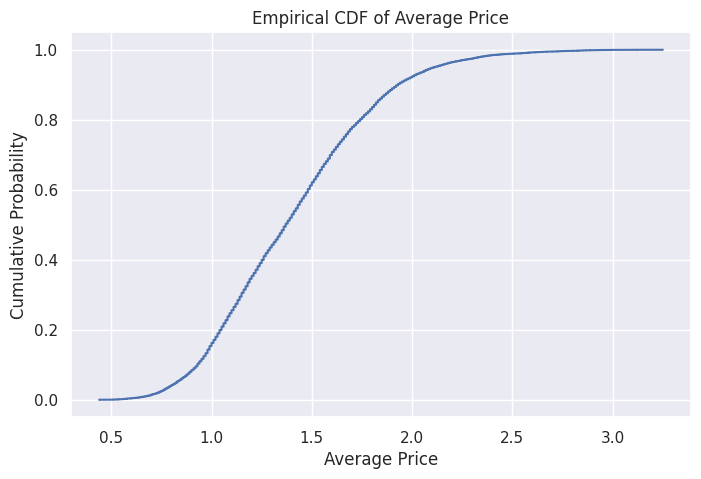

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF

# Empirical Cumulative Distribution Function
ecdf = ECDF(df['AveragePrice'])
print(f"CDF at 1.5: {ecdf(1.5)}")  # P(X <= 1.5)
print(f"CDF at 1: {ecdf(1)}")      # P(X <= 1)
# 0.999999 to avoid including exactly 1.0 in the first probability
print(f"Probability X < 1: {ecdf(0.999999) * 100:.2f}%")
# We substract 0.999999 to avoid removing the probability of exactly 1.0
print(f"Probability 1 <= X <= 1.5: {(ecdf(1.5) - ecdf(0.999999)) * 100:.2f}%")
print(f"Probability X > 1.5: {(1 - ecdf(1.5)) * 100:.2f}%")

# or visually plot the CDF
plt.figure(figsize=(8, 5))
plt.step(ecdf.x, ecdf.y, where='post')
plt.title('Empirical CDF of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


We can see now if the type of avocado (conventional vs. organic) has an impact on the average price by plotting boxplots for each type.

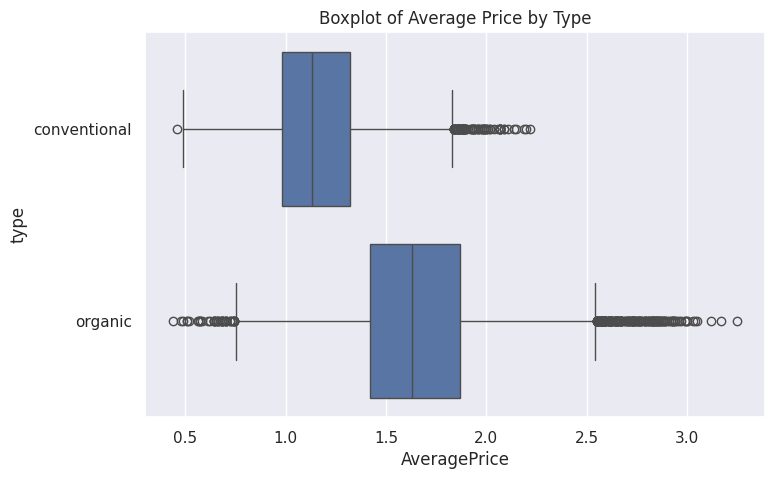

In [12]:
plt.figure(figsize=(8, 5))
plt.title('Boxplot of Average Price by Type')
ax = sns.boxplot(y="type", x="AveragePrice", data=df)

Yeah, organic avocados tend to have a higher average price compared to conventional ones. The median price for organic avocados is noticeably higher, and the interquartile range (IQR) for organic avocados is also shifted upwards compared to conventional avocados. This indicates that not only are organic avocados generally more expensive, but their prices also tend to be higher across the board.

We can see now the impact of region on average price by plotting boxplots for each region.

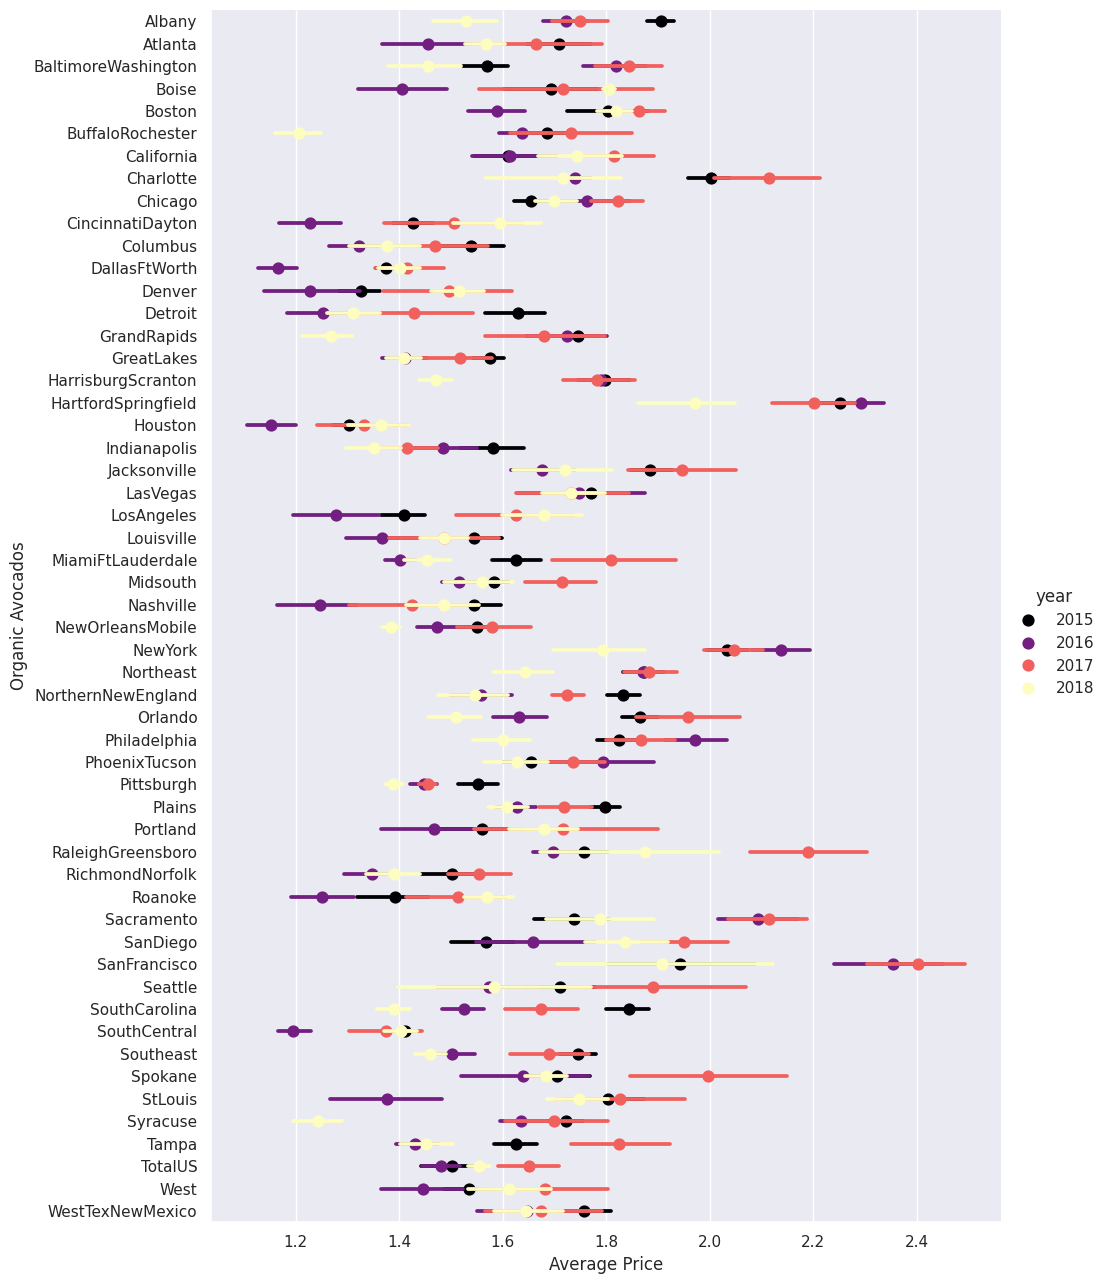

In [13]:
mask = df['type'] == 'organic'
g = sns.catplot(
    x='AveragePrice',
    y='region',
    data=df[mask],
    hue='year',
    height=13,
    aspect=0.8,
    palette='magma',
    kind='point',
    linestyle='None',
)
g.set_axis_labels("Average Price", "Organic Avocados")

Observations:
- Looking at TotalUS price was for organic avocados was higher in 2017 compared to 2015 and 2016, but dropped in 2018.
> Avocado prices were high in the USA in 2017 due to a combination of surging demand and reduced supply caused by a poor harvest in Mexico and drought in California
- San Francisco, Hartford Springfield, Raileigh Greensboro and Charlotte regions have the highest average prices for organic avocados in 2017. Being San Francisco the one with the highest average price.
- During the same time period, Houston and South Central regions had the lowest average prices for organic avocados.

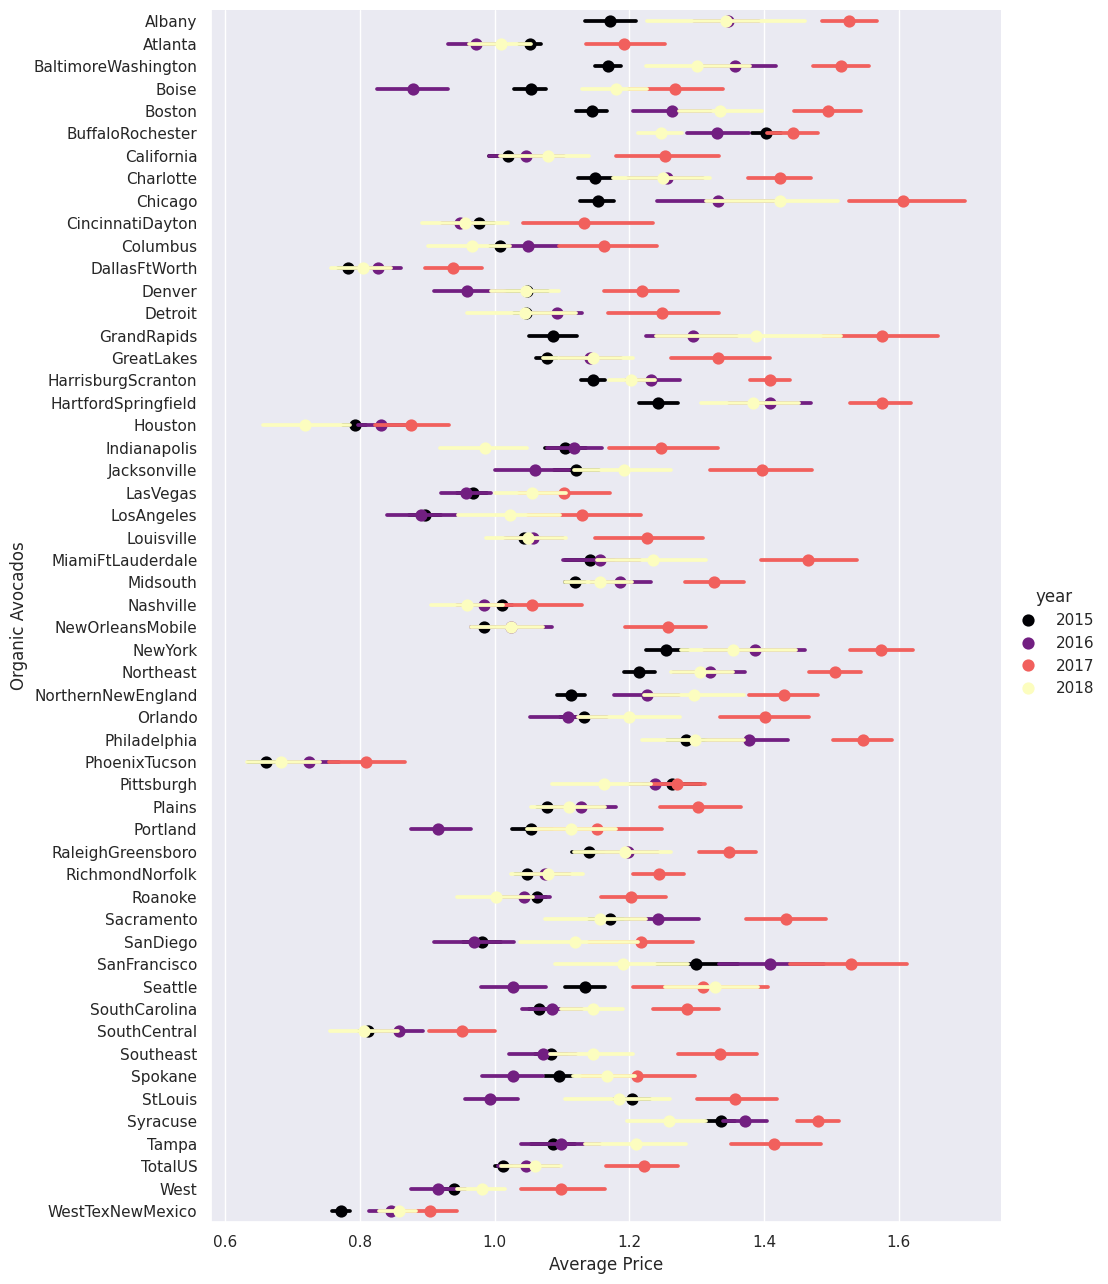

In [14]:
mask = df['type'] == 'conventional'
g = sns.catplot(
    x='AveragePrice',
    y='region',
    data=df[mask],
    hue='year',
    height=13,
    aspect=0.8,
    palette='magma',
    kind='point',
    linestyle='None',
)
g.set_axis_labels("Average Price", "Organic Avocados")

Observations:
- Conventional avocados have lower average prices across all regions compared to organic avocados. But were also higher in 2017 compared to 2015 and 2016, but dropped in 2018.
- San Francisco, New York, Philadelphia, Hartford Springfield, Grand Rapids and Chicago regions have the highest average prices for conventional avocados in 2017. Being Chicago region the one with the highest average price.
- During the same time period, Phoenix Tucson, Houston and West Tex New Mexico regions had the lowest average prices for conventional avocados.

Let's see now the correlation heatmap of the numerical features and the categorical features encoded as numbers.

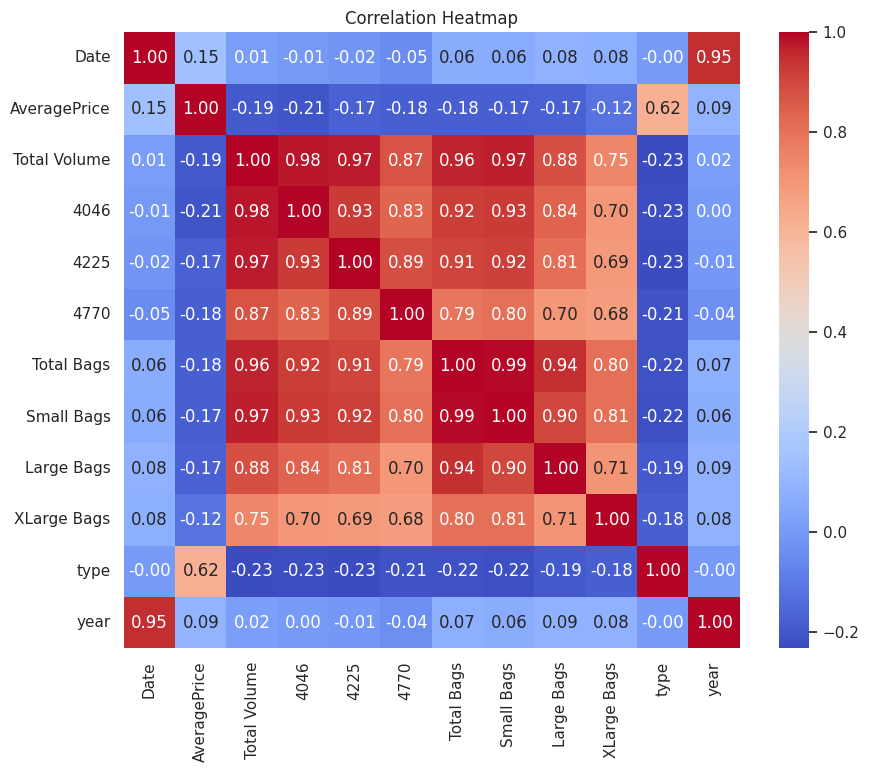

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()
df_encoded['type'] = le.fit_transform(df_encoded['type'])
# we drop temporarily region for correlation heatmap as it is categorical 
df_encoded_no_region = df_encoded.drop(columns=['region'])

plt.figure(figsize=(10, 8))
corr = df_encoded_no_region.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Observations:
- **AveragePrice has a positive correlation with type** (organic avocados are more expensive), and **negative correlation with Total Volume and Total Bags** (higher sales volume is associated with lower prices).
- **Strong positive correlation between Total Volume and Total Bags**, as expected.
- **Total volume has less correlation with 4770 (extra-large variety) and XLarge bags**, indicating that these categories are **less popular**.
- **Strong correlation between small bags and total bags**, indicating that small bags are the **most common bag size** used for selling avocados. 
- **For Total volume, both 4046 (small/medium variety) and 4225 (large variety) have strong correlation**, indicating that both varieties are **equally popular** among consumers.
> Bag sizes have correlation between them. Same for avocado varieties. This could be a problem for predictive modeling due to multicollinearity.

A focused heatmap on Selected Features correlations shows the same insights more clearly.
> we drop date and year as they are not relevant for this analysis, we will use them later for time series analysis

> we use totals only for simplicity

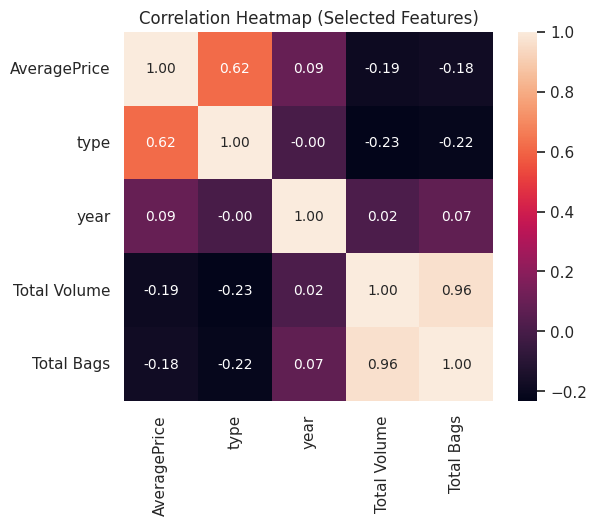

In [32]:
cols = ['AveragePrice', 'type', 'year', 'Total Volume', 'Total Bags']
cm = np.corrcoef(df_encoded[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size': 10},
                 yticklabels=cols, xticklabels=cols)
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

After doing some research we conclude that:
- Bag sizes correlate because: They're all derived from the same "Total Bags" - if you sell more total bags, you naturally sell more in each category. Small bags dominate, so they correlate most strongly with total.
- Avocado varieties (4046, 4225, 4770) correlate because: They all feed into "Total Volume" - retailers typically stock multiple sizes simultaneously, so when overall demand is high, most sizes sell more.
So we have naturally multicollinearity among these features.

Our options before building predictive models are:
- Remove some of the correlated features (e.g., keep only Total Volume and Total Bags, and drop the individual bag sizes and varieties).
- Use dimensionality reduction techniques like PCA to combine correlated features into a smaller set of uncorrelated components.
- Use regularization techniques (like Ridge or Lasso regression) in predictive modeling to mitigate the impact of multicollinearity.

Let's start by validating the multicollinearity mathematically using VIF (Variance Inflation Factor)
- VIF < 5: No problem
- VIF 5-10: Moderate correlation (often acceptable)
- VIF > 10: High multicollinearity (problematic)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_encoded[['Total Bags','Small Bags','Large Bags','XLarge Bags', 'Total Volume', '4046','4225','4770']]
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        feature           VIF
0    Total Bags  2.502000e+14
1    Small Bags  1.429714e+14
2    Large Bags  1.521486e+13
3   XLarge Bags  7.853860e+10
4  Total Volume  5.194565e+09
5          4046  6.923184e+08
6          4225  6.311271e+08
7          4770  4.956326e+06


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_encoded[['Small Bags','Large Bags','XLarge Bags', '4046','4225','4770']]
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       feature        VIF
0   Small Bags  20.457434
1   Large Bags   5.804713
2  XLarge Bags   3.505955
3         4046  10.435894
4         4225  14.060881
5         4770   5.585092


Small Bags still correlated with the other bag sizes
4046, 4225 correlated with 4770

Options to reduce further:
- Option A: Keep as-is:
    - VIF 10-15 is borderline but often acceptable in practice
Especially for tree-based models (Random Forest, XGBoost) which handle multicollinearity better
    - For linear regression, it might slightly inflate coefficient standard errors, but won't break predictions
- Option B: Create ratio features
    - E.g., Small Bags / Total Bags, 4046 / Total Volume
    - This can reduce multicollinearity by normalizing correlated features
    - But may lose interpretability
- Option C: Drop one more feature

If we want to use region as a feature in predictive modeling, we need to encode it numerically. As it has many categories without order we can do it using binary encoding.
> One-hot encoding could also be used but it would create too many new columns.

> We could also consider dropping region if we find that it does not add significant predictive power compared to the complexity it adds.

> We could also consider clustering regions based on average price and sales volume to reduce the number of categories.

In [ ]:
from category_encoders import BinaryEncoder

be = BinaryEncoder(cols=['region'])
df_encoded = be.fit_transform(df_encoded)

# TODO:
- Cluster regions based on average price and sales volume to reduce the number of categories.
- Analyze time series trends of avocado prices over the years.
- Build predictive models to forecast avocado prices based on features like type, region, and sales volume.
- Explore seasonal patterns in avocado sales and prices.